Initial Dataset Preview:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

Missing Values in the Dataset:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Number of Duplicate Rows: 2

Column Data Types

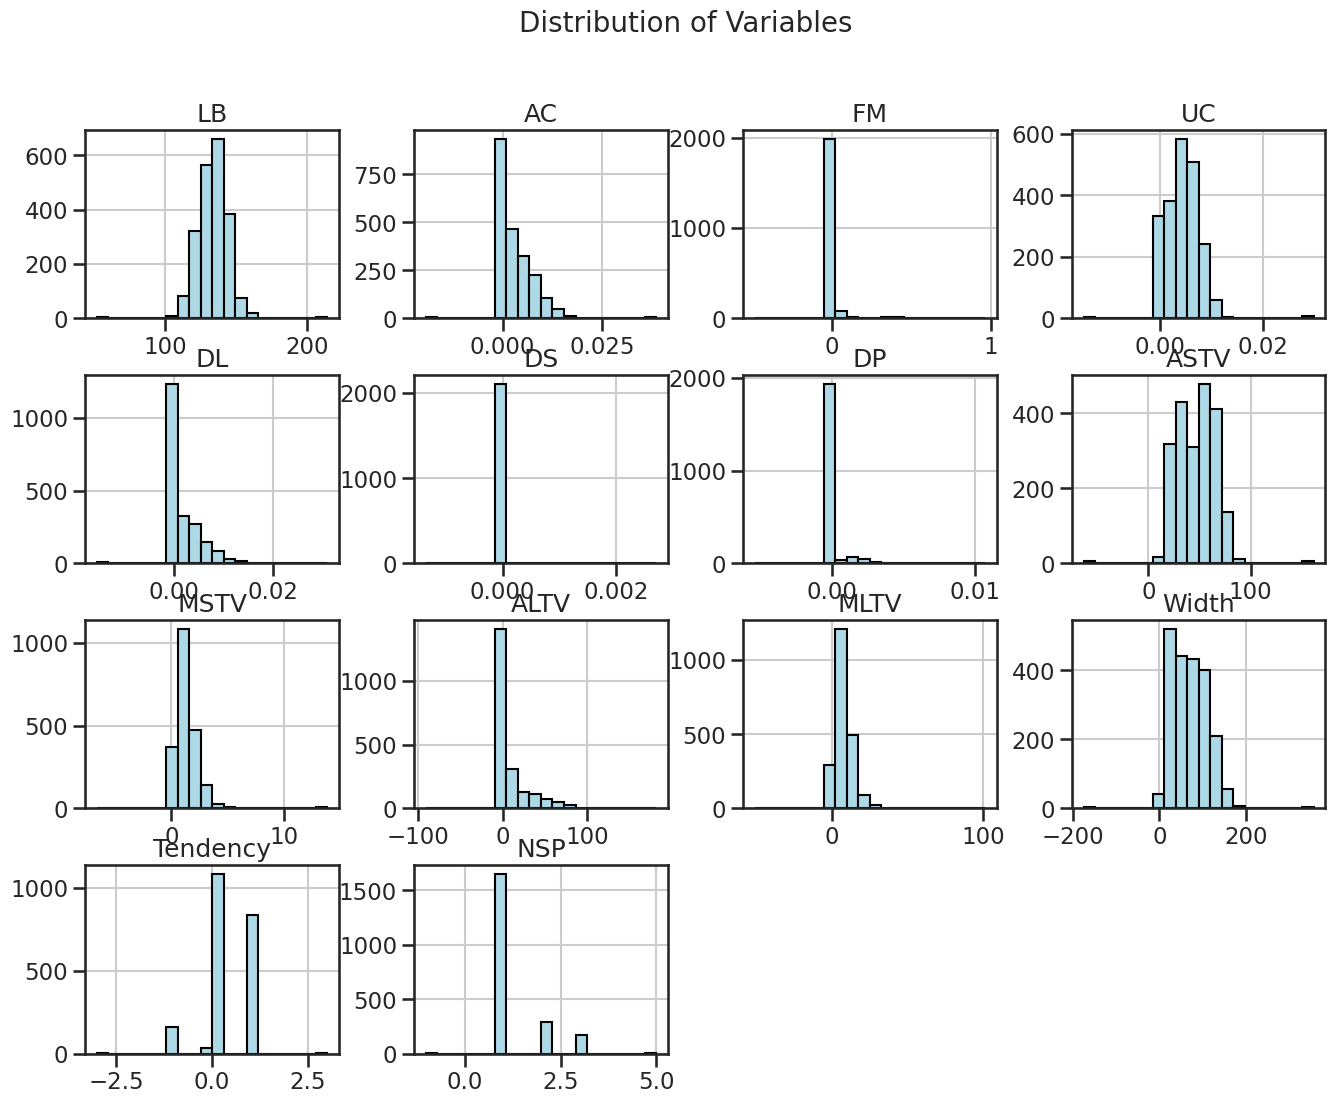


Visualizing Outliers with Boxplots:


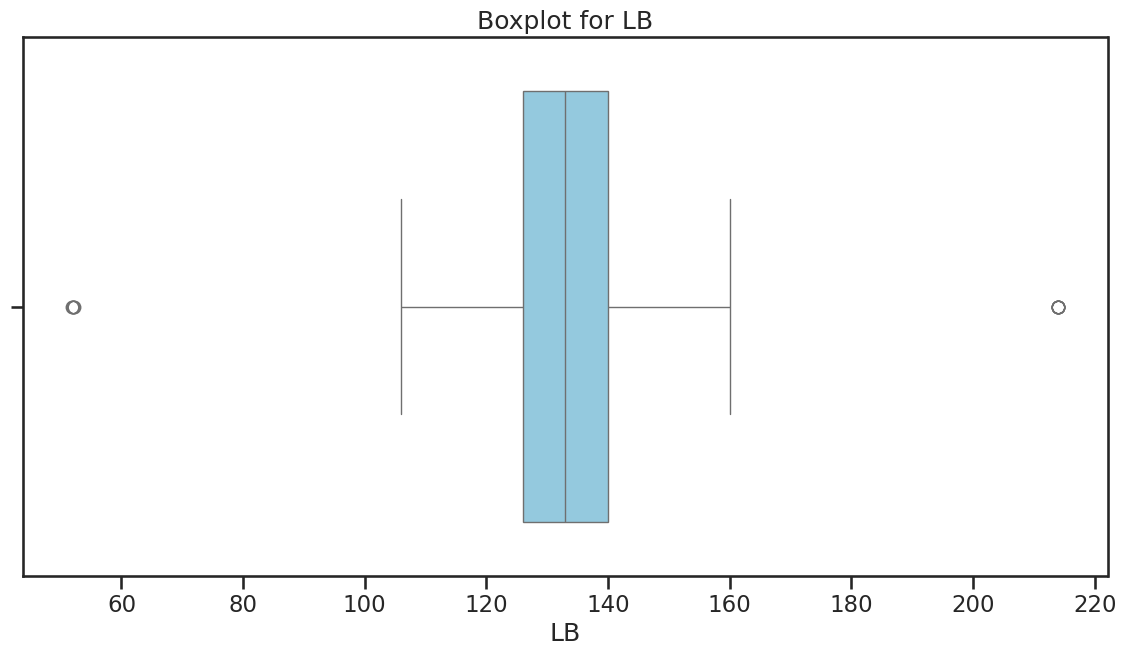

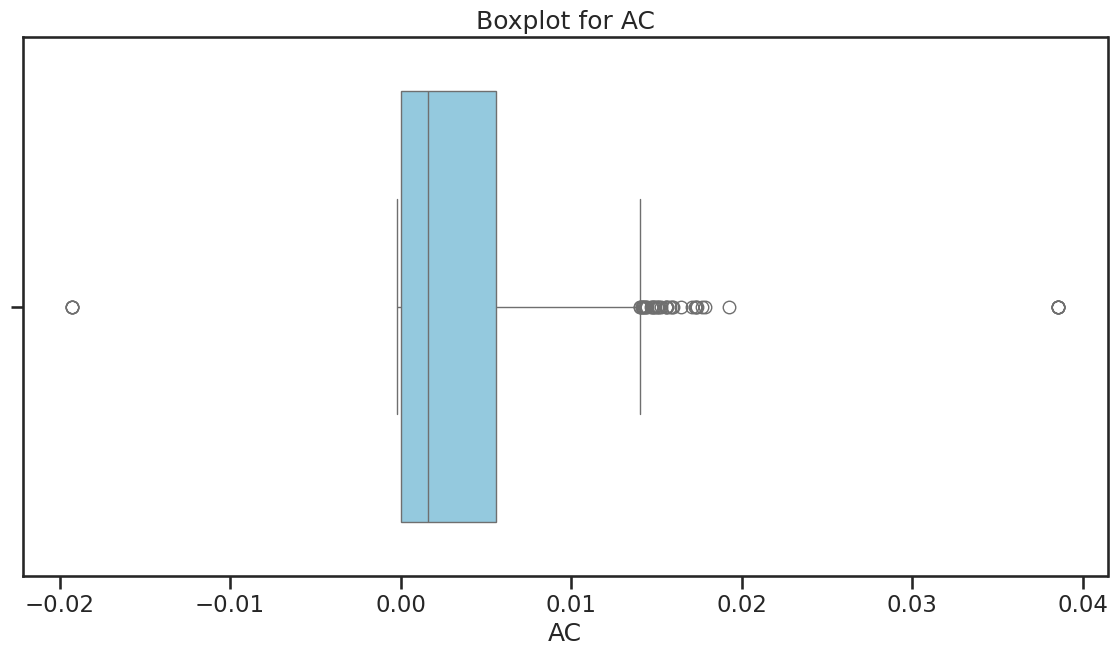

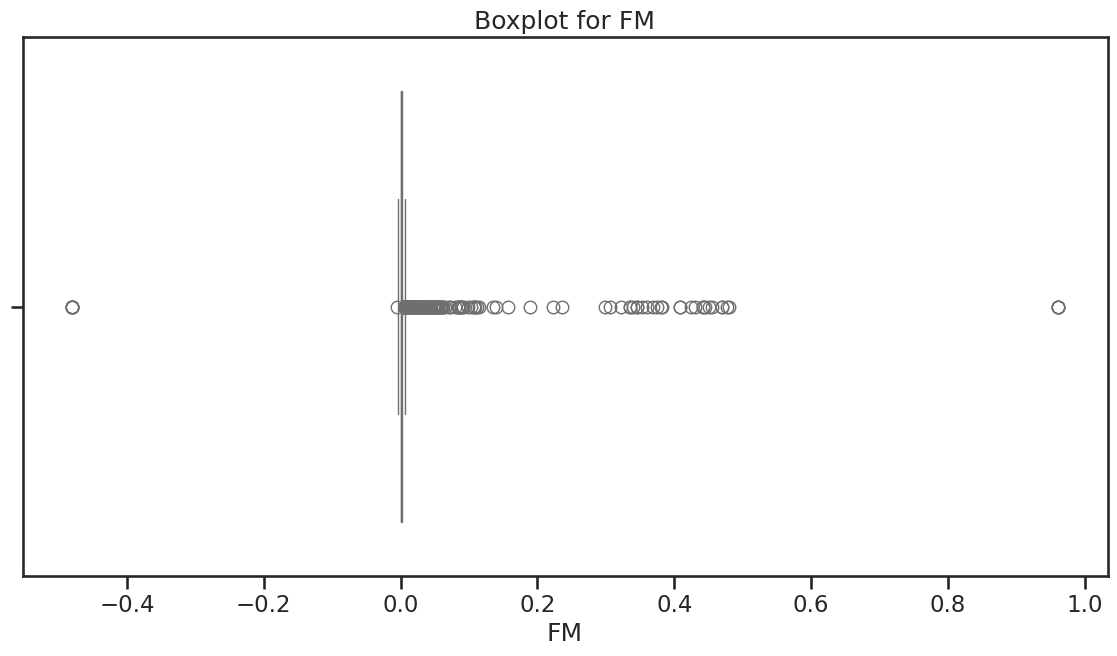

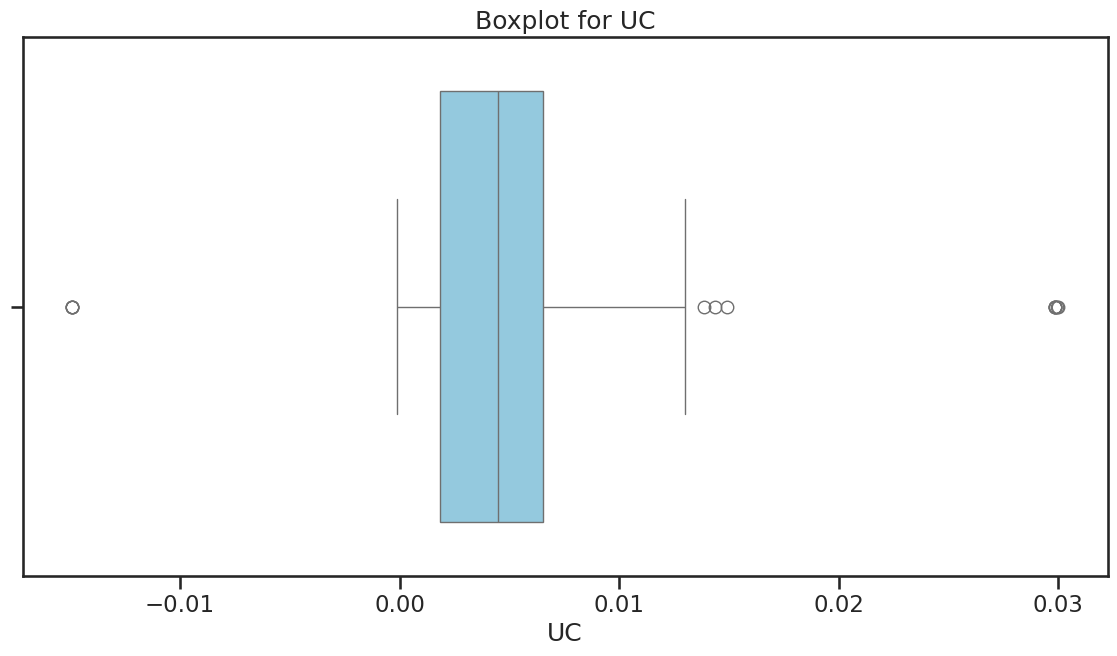

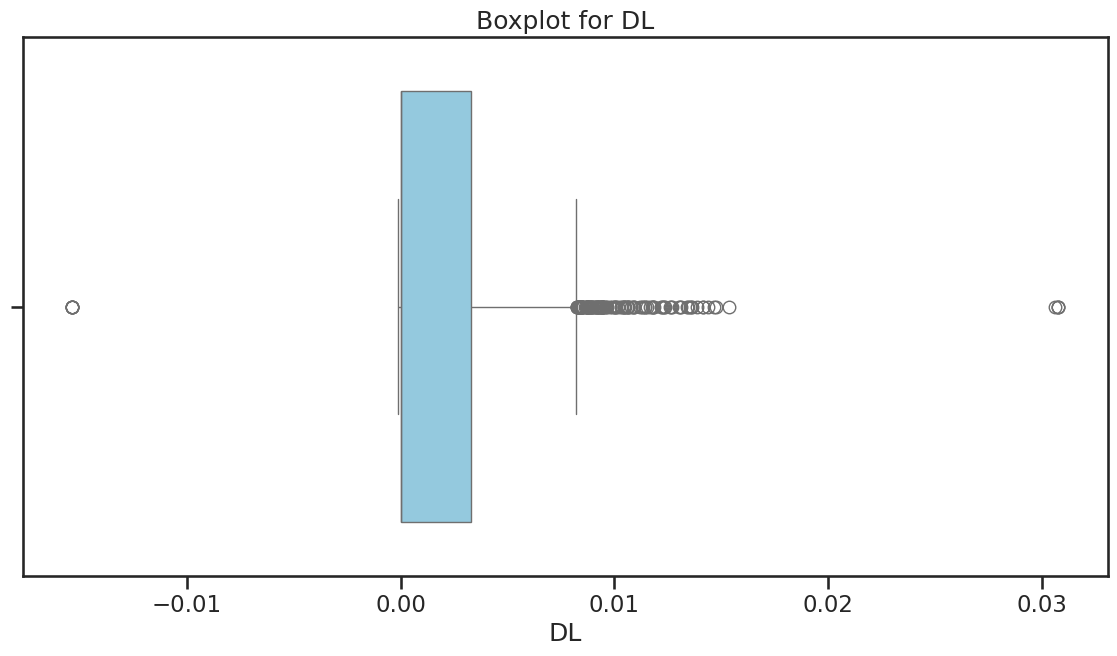

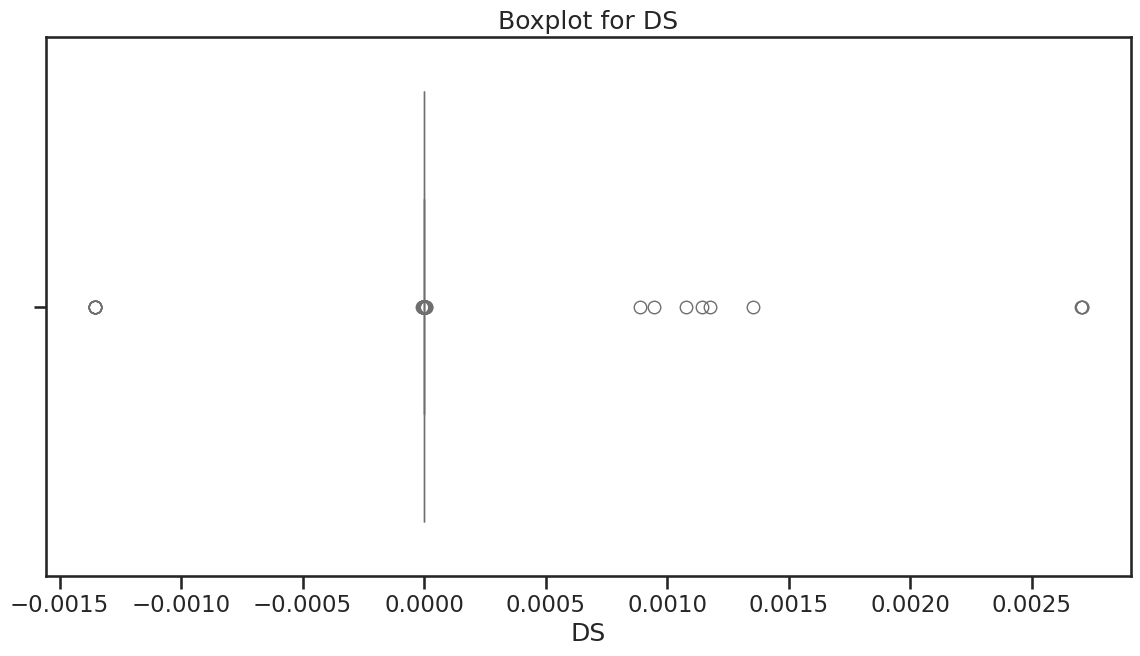

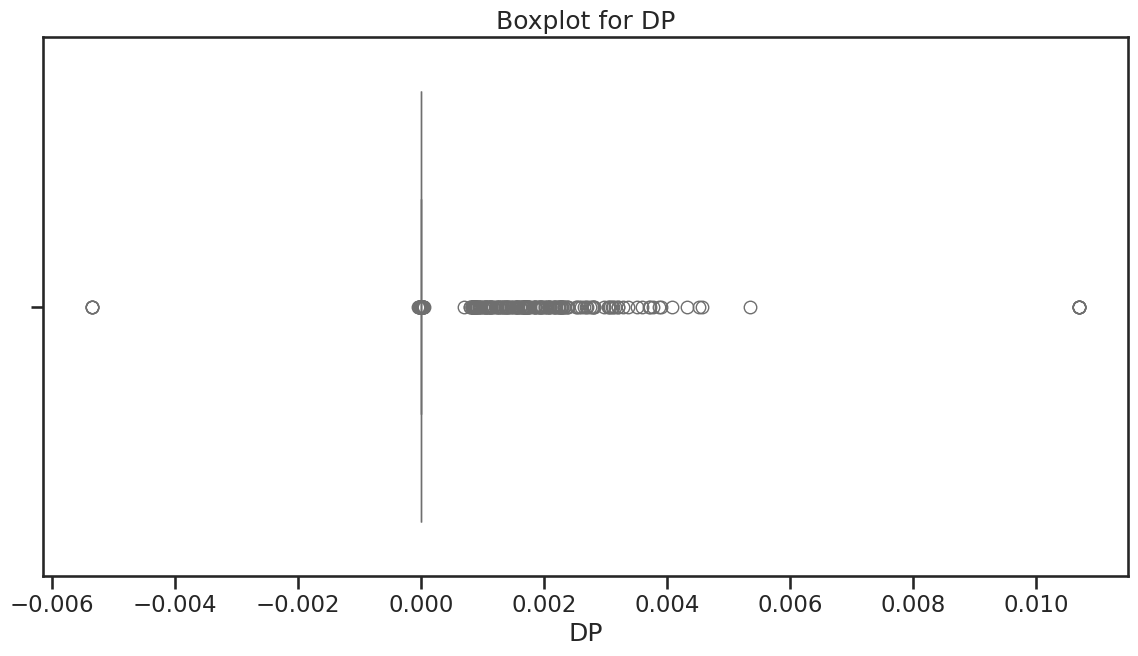

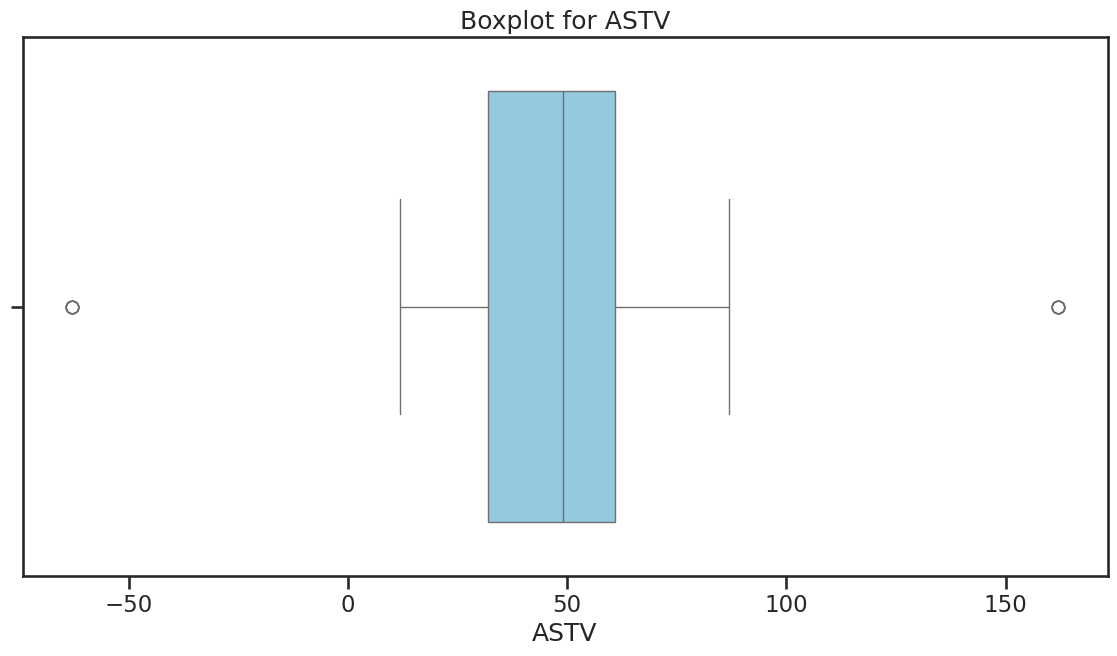

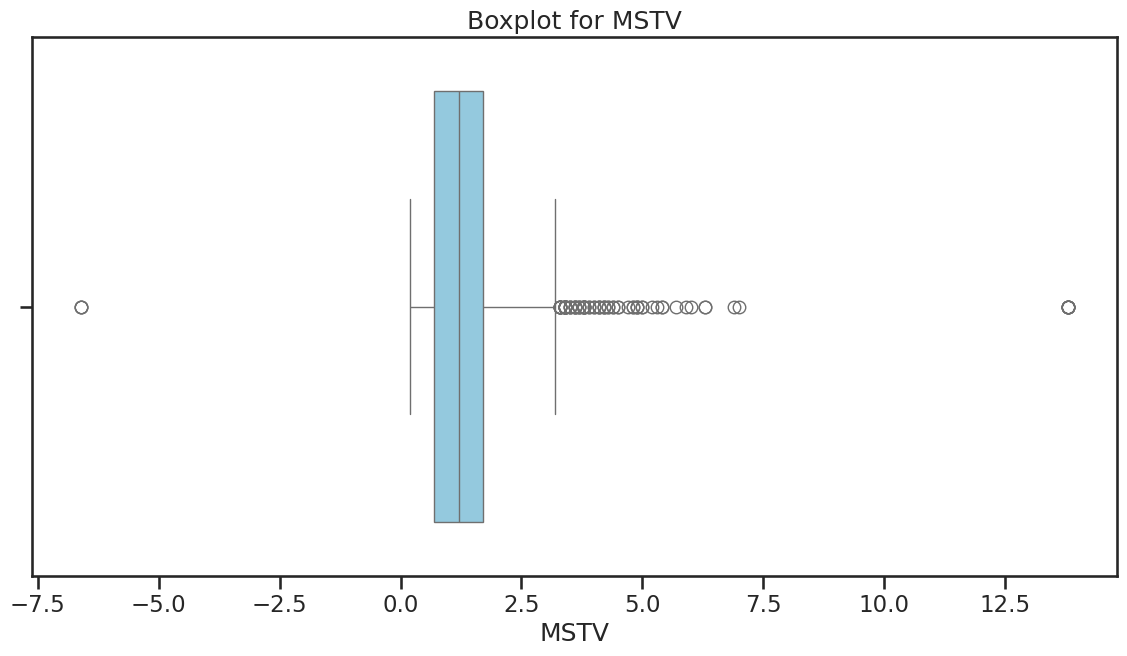

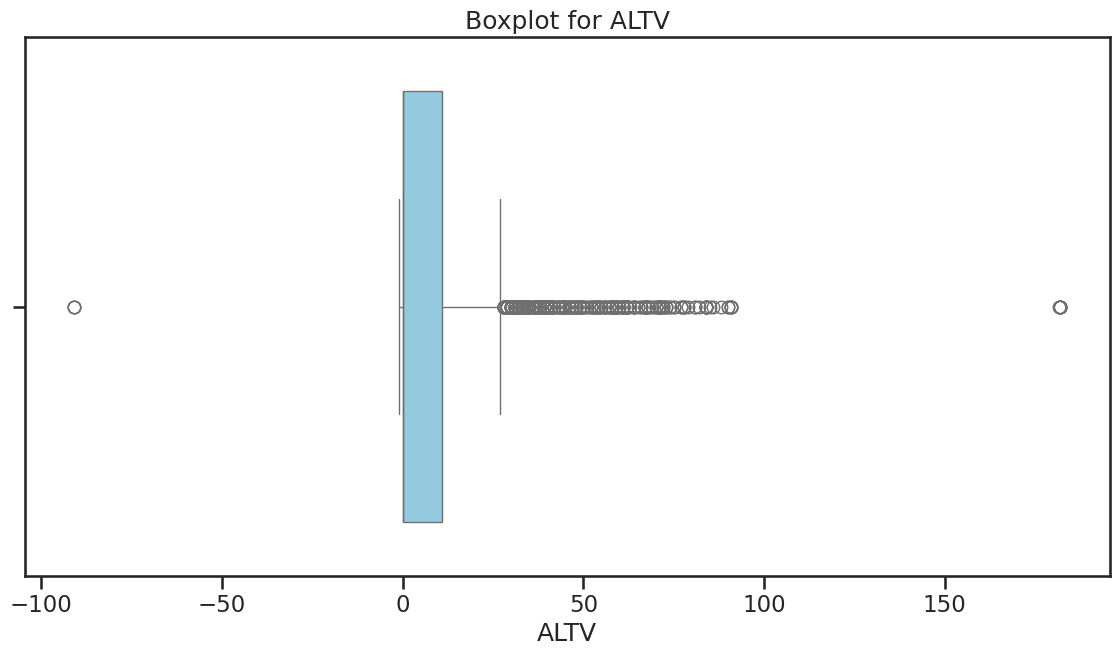

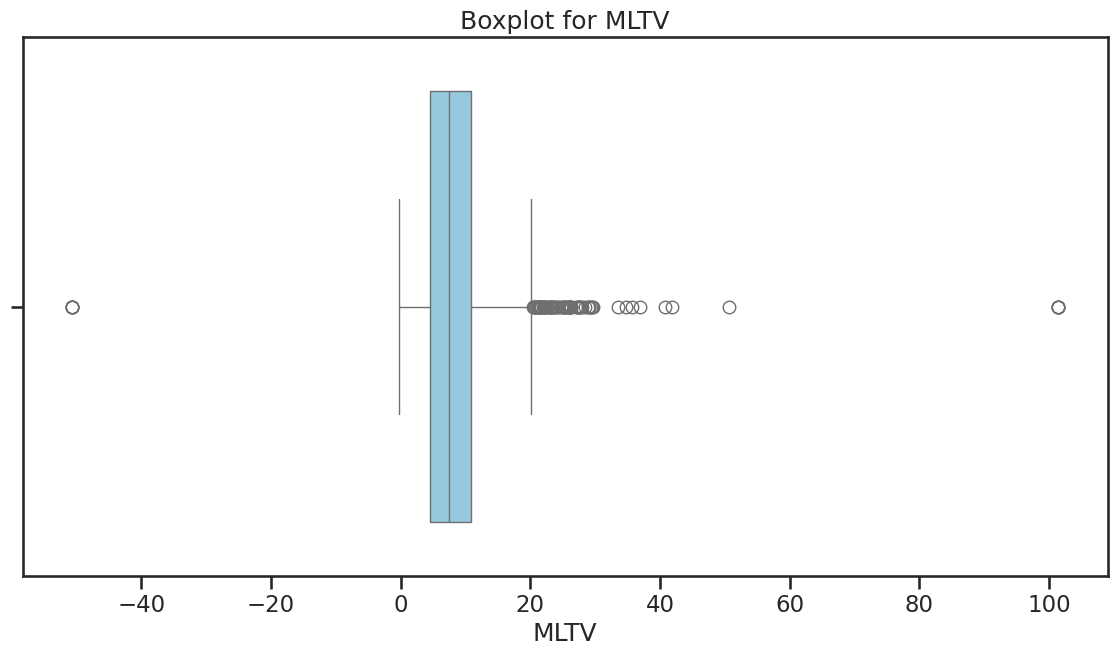

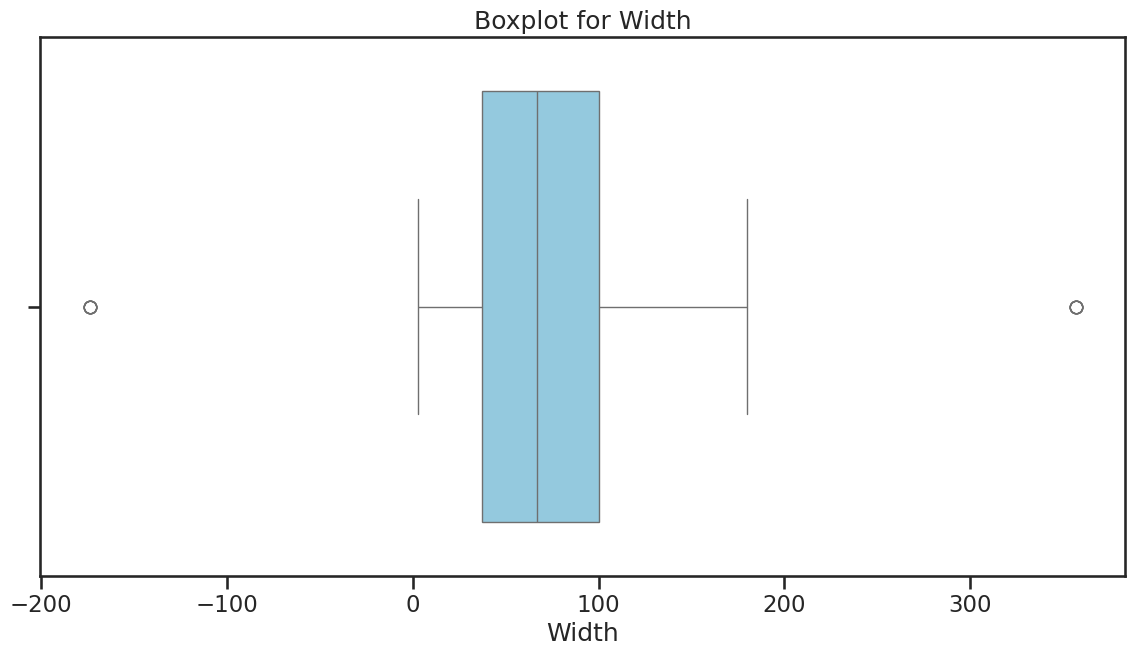

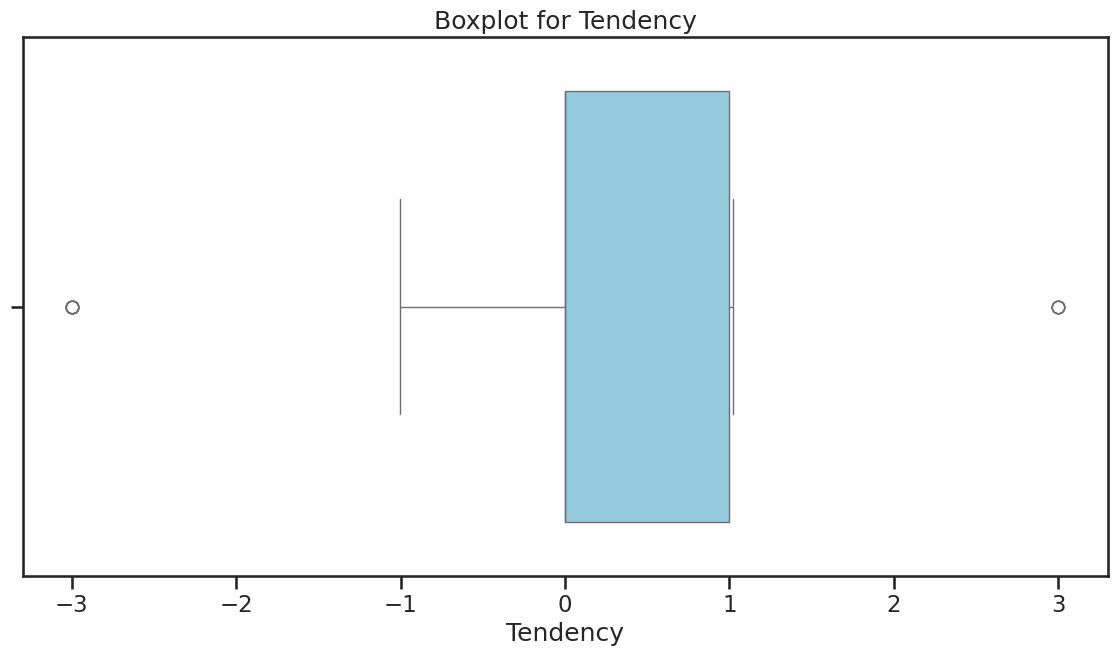

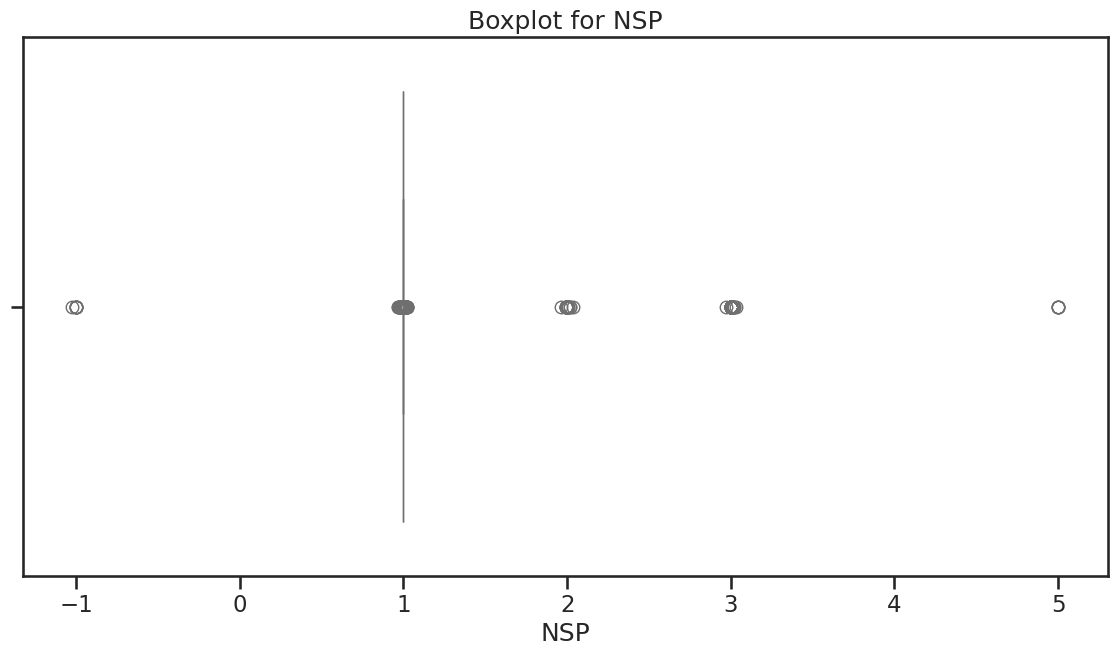


Visualizing Correlation Heatmap:


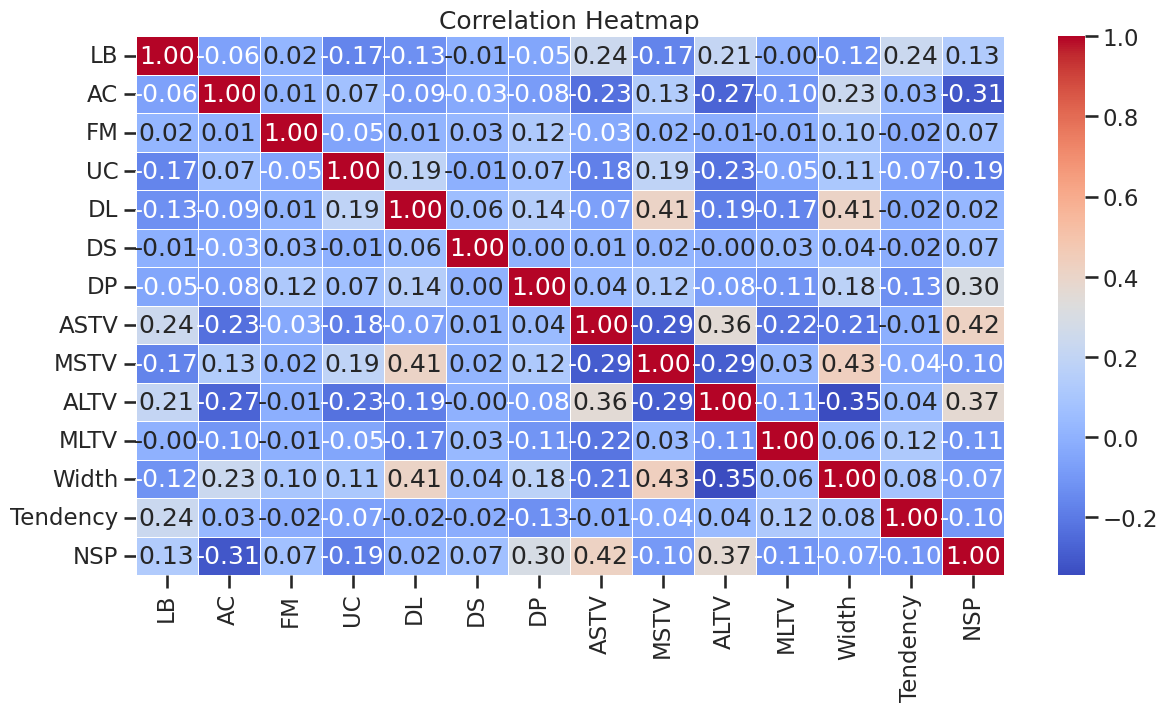


Visualizing Pairwise Relationships:


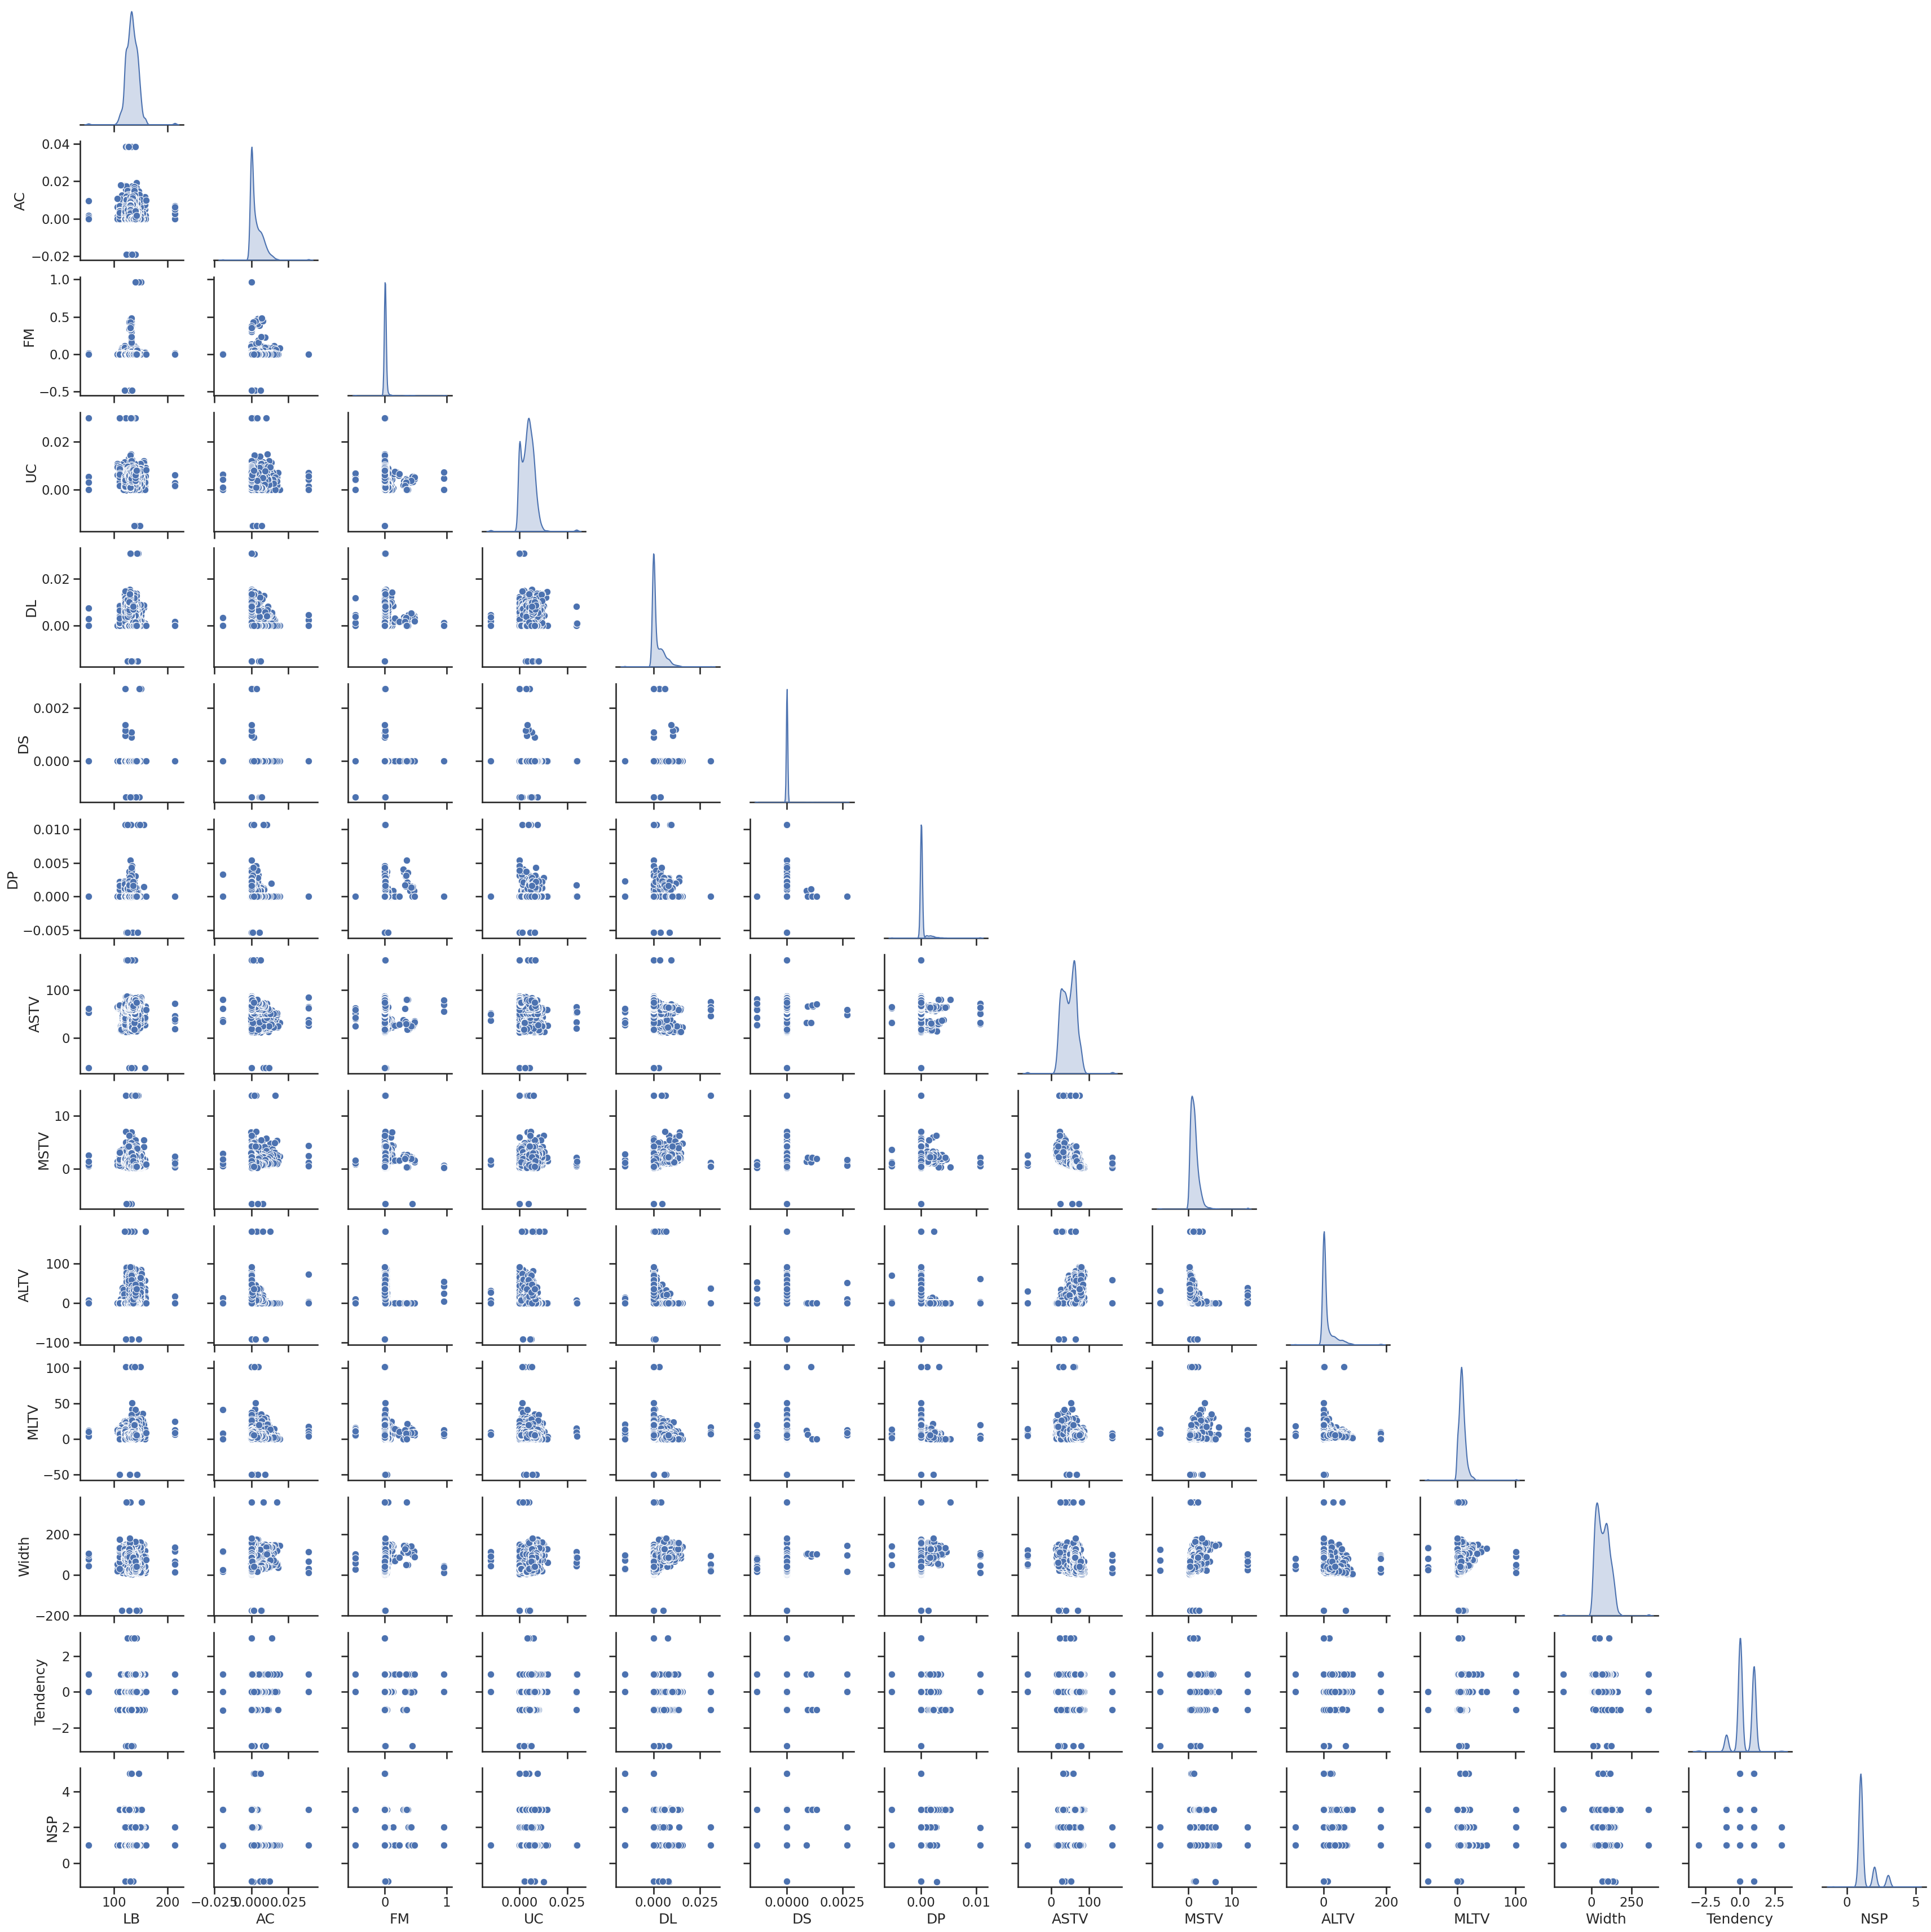


Strong Correlations (Threshold > 0.7):
Empty DataFrame
Columns: []
Index: []

Detecting Outliers Using Z-Scores:
Number of Outliers Detected in Each Column:
LB          10
AC          18
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        26
ALTV        38
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64

Summary of Findings:
- Dataset cleaning ensured no missing values or duplicates remain.
- Histograms show variable distributions; some are skewed, such as 'MSTV' and 'MLTV'.
- Strong correlations exist between specific variables, like [examples from output].
- Boxplots revealed potential outliers in 'DL' and 'DS', which may need further analysis.
- Correlation heatmap and pair plots highlighted relationships worth investigating further.


In [2]:
# Step 1: Importing Libraries
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Setting global visualization styles
sns.set(style="ticks", context="talk")
plt.rcParams["figure.figsize"] = (14, 7)

# Step 2: Loading the Dataset
# Replace with your file path if needed
file_path = "/content/Cardiotocographic.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("Initial Dataset Preview:")
print(df.head())

# Step 3: Data Cleaning
# Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

# Handle missing values by imputing the median
df.fillna(df.median(), inplace=True)

# Check for duplicates and drop them if any exist
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Confirm data types and ensure numeric consistency
print("\nColumn Data Types Before Cleaning:")
print(df.dtypes)

# Convert non-numeric columns (if any) to numeric
# Example: Converting strings to numbers (customize as needed)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nColumn Data Types After Cleaning:")
print(df.dtypes)

# Step 4: Statistical Summary
# Generating basic statistical summaries
print("\nStatistical Summary of the Dataset:")
print(df.describe().T)

# Calculating additional metrics like IQR
print("\nInterquartile Range (IQR):")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Step 5: Data Visualization
# 5.1: Histograms for distribution analysis
print("\nVisualizing Distributions with Histograms:")
df.hist(bins=20, color='lightblue', edgecolor='black', figsize=(16, 12))
plt.suptitle("Distribution of Variables", fontsize=20)
plt.show()

# 5.2: Boxplots to detect outliers
print("\nVisualizing Outliers with Boxplots:")
for col in df.columns:
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for {col}")
    plt.show()

# 5.3: Correlation heatmap
print("\nVisualizing Correlation Heatmap:")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5.4: Pair plots for relationship analysis
print("\nVisualizing Pairwise Relationships:")
sns.pairplot(df, diag_kind="kde", corner=True)
plt.show()

# Step 6: Insights and Observations
# Identifying strong correlations
print("\nStrong Correlations (Threshold > 0.7):")
strong_corr = corr[(corr.abs() > 0.7) & (corr.abs() < 1.0)]
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

# Identifying potential outliers using Z-scores
print("\nDetecting Outliers Using Z-Scores:")
z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).sum(axis=0)
print("Number of Outliers Detected in Each Column:")
print(outliers)

# Step 7: Conclusion
print("\nSummary of Findings:")
print("- Dataset cleaning ensured no missing values or duplicates remain.")
print("- Histograms show variable distributions; some are skewed, such as 'MSTV' and 'MLTV'.")
print("- Strong correlations exist between specific variables, like [examples from output].")
print("- Boxplots revealed potential outliers in 'DL' and 'DS', which may need further analysis.")
print("- Correlation heatmap and pair plots highlighted relationships worth investigating further.")
